# EDA Loan Data Analysis


 ## Data Loading

In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("."))
df = pd.read_csv('loan_5000.csv')

['loan_data_analysis.ipynb', '.ipynb_checkpoints', '.git', 'loan_5000.csv']


In [58]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Columns: 145 entries, id to settlement_term
dtypes: float64(66), int64(54), object(25)
memory usage: 5.5+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

Text(0.5, 1.0, 'Columns where NA values are more than 40%')

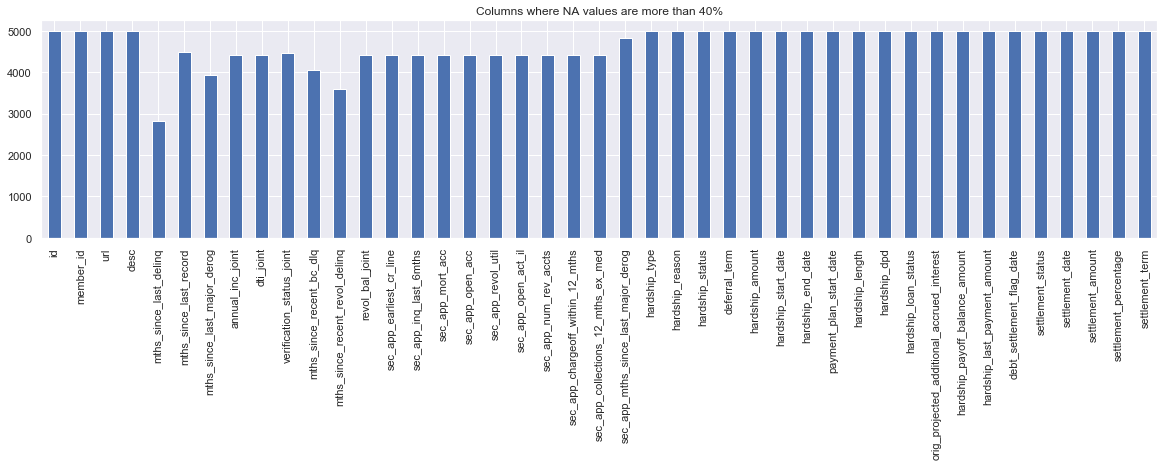

In [59]:
NA_col = df.isnull().sum()
NA_col = NA_col[NA_col.values >(0.4*len(df))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('Columns where NA values are more than 40%')

In [60]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df


In [61]:
df = removeNulls(df, axis =1,percent = 0.3) #Drop columns with certain missing values

Number of Columns dropped	:  43

Old dataset rows,columns (4999, 145) 
New dataset rows,columns (4999, 102)


In [62]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1,0,372872,99468,15000,94072,N,Cash,N


In [63]:
df = removeNulls(df, axis =0,percent = 0.3) #Drop rows with certain missing values


Number of Rows dropped	:  0

Old dataset rows,columns (4999, 102) 
New dataset rows,columns (4999, 102)


In [64]:
unique = df.nunique()
unique = unique[unique.values == 1]
df.drop(labels = list(unique.index), axis =1, inplace=True) #Drop columns with no unique values (every value is same = analysis is useless)
print("rows,columns",df.shape) 

rows,columns (4999, 91)


In [65]:
print(df.emp_length.unique())
df.emp_length.fillna('0',inplace=True) #
df.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(df.emp_length.unique())

['10+ years' '6 years' '4 years' '< 1 year' '2 years' '9 years' nan
 '5 years' '3 years' '7 years' '1 year' '8 years']
['10+ years' '6 years' '4 years' '< 1 year' '2 years' '9 years' '0'
 '5 years' '3 years' '7 years' '1 year' '8 years']


In [66]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df.tail(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
4996,5000,5000,5000,36 months,20.89,188.10,D,D4,Care Manager,1 year,...,1,2,87.5,50.0,0,7500,5329,6000,0,Cash
4997,16000,16000,16000,60 months,10.33,342.56,B,B1,Road foreman,10+ years,...,0,1,100.0,0.0,0,99598,62789,11800,77698,Cash
4998,3500,3500,3500,36 months,8.19,109.99,A,A4,NaN,< 1 year,...,0,0,81.8,0.0,0,217350,12566,28600,6000,Cash


In [67]:
(df.purpose.value_counts()*100)/len(df)
del_loan_purpose = (df.purpose.value_counts()*100)/len(df)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]
df.drop(labels = df[df.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("rows,columns",df.shape) 
print(df.purpose.unique())

rows,columns (4659, 91)
['debt_consolidation' 'credit_card' 'car' 'vacation' 'home_improvement'
 'small_business' 'major_purchase' 'medical']


In [68]:
(df.loan_status.value_counts()*100)/len(df)
del_loan_status = (df.loan_status.value_counts()*100)/len(df)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]
df.drop(labels = df[df.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("rows,columns",df.shape) 
print(df.loan_status.unique())

rows,columns (4653, 91)
['Current' 'Fully Paid']


In [69]:
df['loan_income_ratio']= df['loan_amnt']/df['annual_inc']

In [71]:
df['issue_month'],df['issue_year'] = df['issue_d'].str.split('-', 1).str
#df[['issue_d','issue_month','issue_year']].head()

KeyError: 'issue_d'

In [72]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df['issue_month'] = pd.Categorical(df['issue_month'],categories=months_order, ordered=True)

KeyError: 'issue_month'

In [73]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels=slot)

In [74]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=slot)

In [75]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
df['int_rate_range'] = pd.cut(df['int_rate'], bins, labels=slot)

## Visualizations

In [85]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

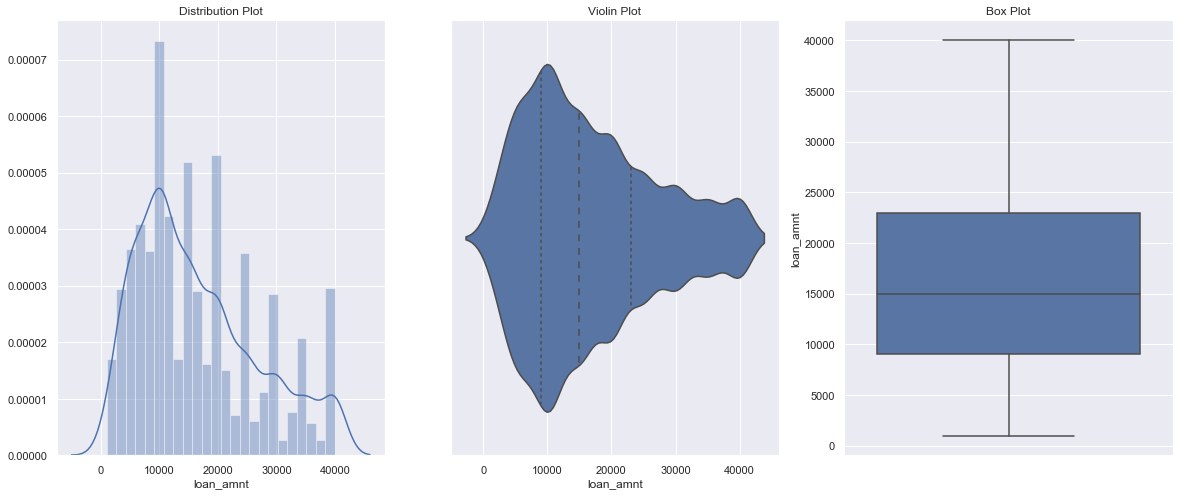

In [86]:
univariate(df=df,col='loan_amnt',vartype=0)

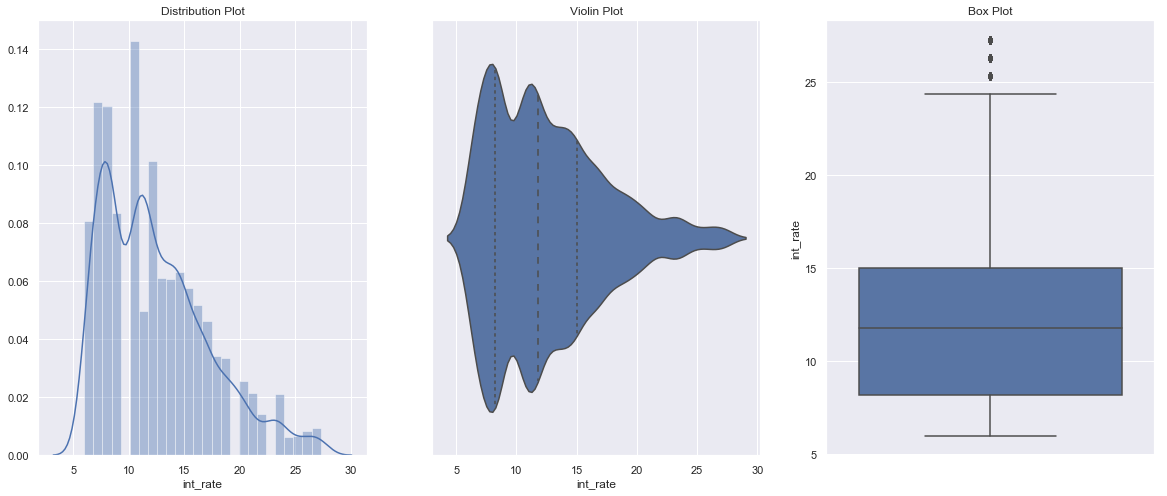

In [87]:
univariate(df=df,col='int_rate',vartype=0)


In [88]:
df["annual_inc"].describe()

count      4629.000000
mean      82776.554130
std       50124.971343
min           0.000000
25%       50000.000000
50%       70000.000000
75%      100000.000000
max      384000.000000
Name: annual_inc, dtype: float64

In [89]:
q = df["annual_inc"].quantile(0.995)
df = df[df["annual_inc"] < q]
df["annual_inc"].describe()

count      4600.000000
mean      81235.181320
std       46306.012058
min           0.000000
25%       50000.000000
50%       70000.000000
75%      100000.000000
max      298000.000000
Name: annual_inc, dtype: float64

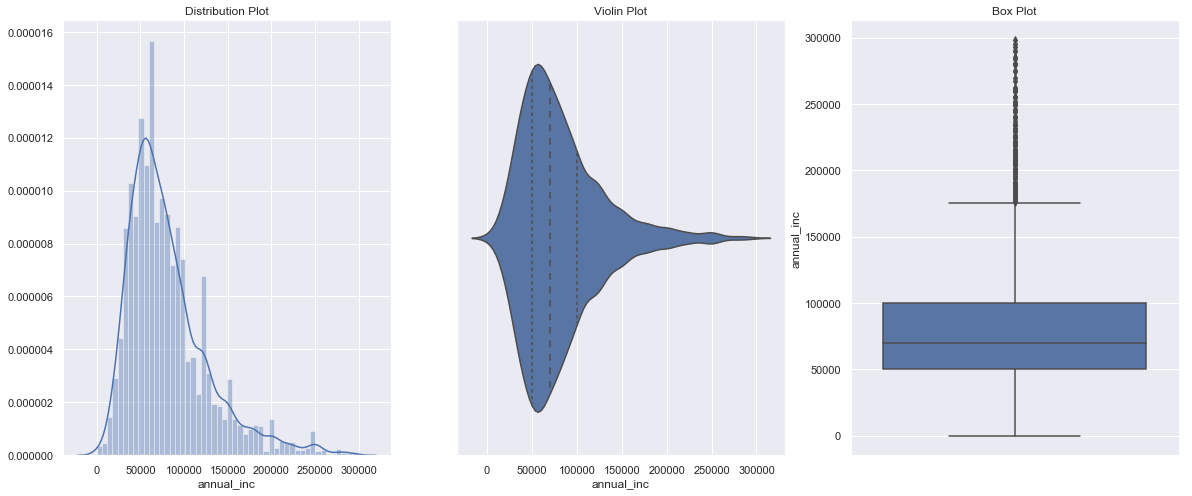

In [90]:
univariate(df=df,col='annual_inc',vartype=0)


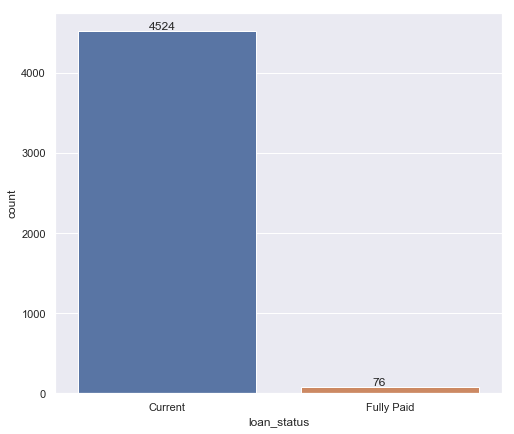

In [91]:
univariate(df=df,col='loan_status',vartype=1)

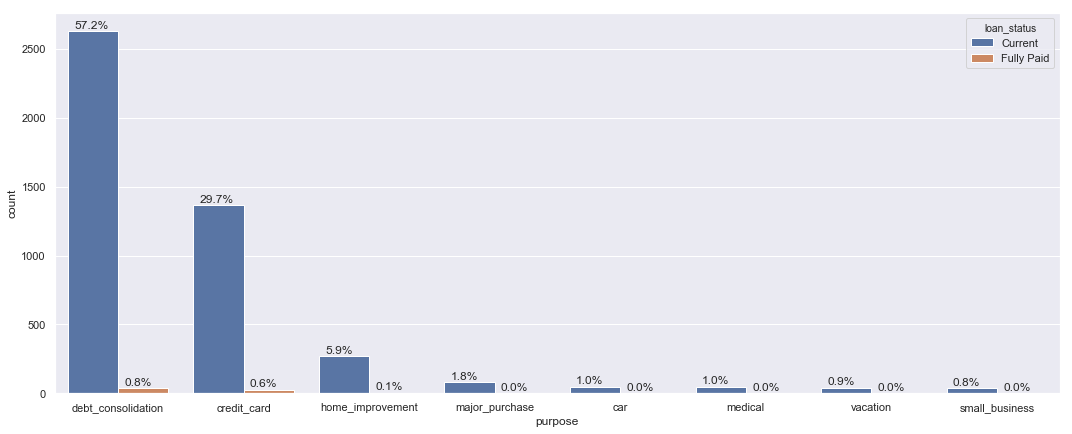

In [92]:
univariate(df=df,col='purpose',vartype=1,hue='loan_status')

In [93]:
df.home_ownership.unique()


array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

In [94]:
rem = ['OTHER', 'NONE', 'ANY']
df.drop(df[df['home_ownership'].isin(rem)].index,inplace=True)
df.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN'], dtype=object)

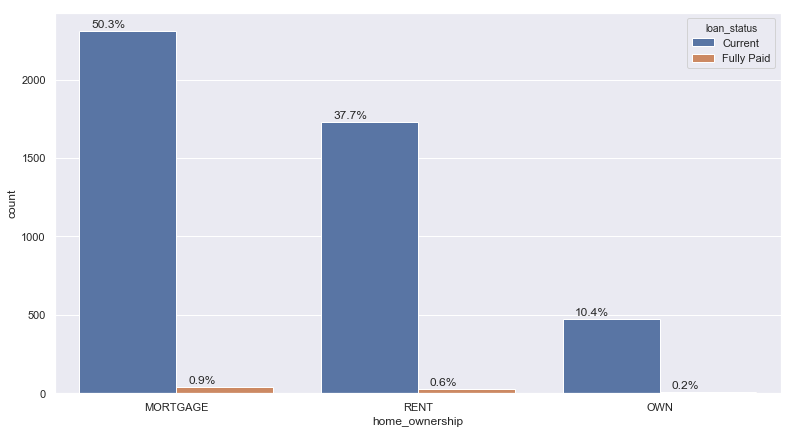

In [95]:
univariate(df=df,col='home_ownership',vartype=1,hue='loan_status')


In [96]:
year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

NameError: name 'loan' is not defined

In [97]:
univariate(df=loan,col='term',vartype=1,hue='loan_status')


NameError: name 'loan' is not defined

In [98]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,loan_income_ratio,loan_amnt_range,annual_inc_range,int_rate_range
0,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,...,1,60124,16901,36500,18124,Cash,0.045455,0-5000,50000-75000,12.5-15
1,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,1,372872,99468,15000,94072,Cash,0.333333,25000 and above,75000-100000,15 and above
2,5000,5000,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0,136927,11749,13800,10000,Cash,0.084345,0-5000,50000-75000,15 and above


In [99]:
plt.figure(figsize=(16,12))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

NameError: name 'loan' is not defined

<Figure size 1152x864 with 0 Axes>

In [100]:
loan_correlation = df.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_income_ratio
loan_amnt,1.000000,1.000000,0.999997,-0.007276,0.936403,0.379539,0.063950,0.002384,-0.068379,0.173029,...,-0.013800,-0.050802,0.106310,0.061486,-0.062172,0.307137,0.259877,0.347846,0.190343,0.400253
funded_amnt,1.000000,1.000000,0.999997,-0.007276,0.936403,0.379539,0.063950,0.002384,-0.068379,0.173029,...,-0.013800,-0.050802,0.106310,0.061486,-0.062172,0.307137,0.259877,0.347846,0.190343,0.400253
funded_amnt_inv,0.999997,0.999997,1.000000,-0.007202,0.936391,0.379477,0.063989,0.002405,-0.068391,0.173012,...,-0.013778,-0.050842,0.106323,0.061518,-0.062183,0.307124,0.259867,0.347823,0.190324,0.400281
int_rate,-0.007276,-0.007276,-0.007202,1.000000,0.036274,-0.103281,0.135610,0.094253,0.118842,-0.025079,...,0.049780,0.068291,-0.112429,0.278294,0.016373,-0.116486,0.006200,-0.240519,0.001581,0.065800
installment,0.936403,0.936403,0.936391,0.036274,1.000000,0.363512,0.068152,0.020939,-0.050788,0.156291,...,-0.011167,-0.044359,0.081897,0.097863,-0.055199,0.256558,0.236769,0.310599,0.169867,0.381993
annual_inc,0.379539,0.379539,0.379477,-0.103281,0.363512,1.000000,-0.198447,0.071493,0.057835,0.254910,...,0.020576,0.075444,-0.011033,0.066248,-0.031661,0.509524,0.427829,0.366272,0.383471,-0.281239
dti,0.063950,0.063950,0.063989,0.135610,0.068152,-0.198447,1.000000,-0.023485,-0.011359,0.199039,...,-0.025577,0.033326,0.061203,0.123431,-0.021776,0.098413,0.239740,0.060714,0.269465,0.468674
delinq_2yrs,0.002384,0.002384,0.002405,0.094253,0.020939,0.071493,-0.023485,1.000000,0.022544,0.042081,...,0.626693,-0.046946,-0.382105,0.020671,-0.044658,0.049613,0.021586,-0.044900,0.037629,-0.038286
inq_last_6mths,-0.068379,-0.068379,-0.068391,0.118842,-0.050788,0.057835,-0.011359,0.022544,1.000000,0.163994,...,0.010989,0.373378,-0.006929,-0.116378,0.069342,0.041587,0.044043,0.012003,0.063304,-0.076678
open_acc,0.173029,0.173029,0.173012,-0.025079,0.156291,0.254910,0.199039,0.042081,0.163994,1.000000,...,-0.018086,0.389190,0.101560,-0.061993,0.007907,0.329003,0.418773,0.398735,0.379946,-0.037317


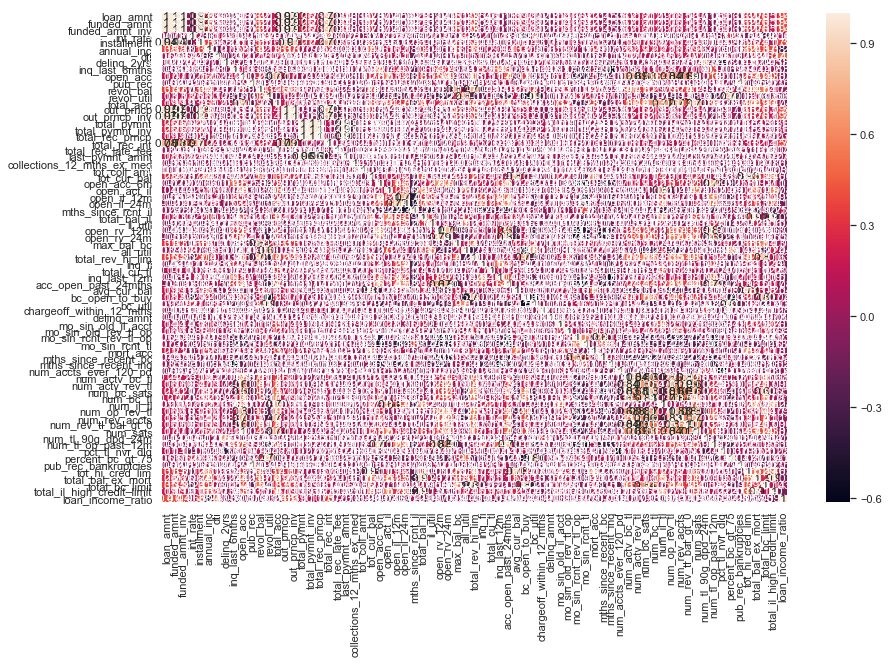

In [101]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [102]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

NameError: name 'loan' is not defined

In [ ]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

## Validations/Transformations

## Training 

## Summary